In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline
%reload_ext autoreload
%autoreload 2
import ipywidgets
from ipywidgets import interact, interact_manual
import ipywidgets as widgets
import os
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sb
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models


In [33]:
pred_phases = pd.read_csv('/mnt/hdd/cmr_phase_detection_experiments/2022-12-16_13_33_397073/phase_regression/inference_gcn/pred_phases.csv')

In [34]:
valid_cols = [col for col in pred_phases.columns if 'unnamed' not in col.lower()]
pred_phases = pred_phases[valid_cols]
pred_phases['pat_long'] = pred_phases['patient']
pred_phases['patient'] = pred_phases['pat_long'].apply(lambda x: x.split('_volume')[0].split('0_0000-')[1].split('_')[0])
pred_phases['patient'] = pred_phases['patient'].str.lower()

In [35]:
pred_phases

,ED,MS,ES,PF,MD,patient,pat_long
0,0,2,5,8,11,02z1l14n,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
1,23,4,11,15,20,04nejquz,0_0000-04nejquz_2007-03-13_volume_clean.nrrd\n
2,12,0,2,5,8,0ae4r74l,0_0000-0ae4r74l_1900-01-01_volume_clean.nrrd\n
3,0,5,10,14,22,0hqqw4zn,0_0000-0hqqw4zn_2007-05-23_volume_clean.nrrd\n
4,0,3,6,9,11,0ptv75mp,0_0000-0ptv75mp_2005-06-27_volume_clean.nrrd\n
...,...,...,...,...,...,...,...
260,1,4,7,10,13,zy8h5791,0_0000-zy8h5791_2005-06-16_volume_clean.nrrd\n
261,0,5,9,12,15,zyrm6zll,0_0000-zyrm6zll_2006-02-14_volume_clean.nrrd\n
262,0,4,8,11,15,zz8r00v6,0_0000-zz8r00v6_2006-05-08_volume_clean.nrrd\n
263,0,4,9,12,16,zzfy001m,0_0000-zzfy001m_2006-11-20_volume_clean.nrrd\n


In [36]:
meta = pd.read_csv('/mnt/ssd2/data/tof/02_imported_4D_unfiltered/SAx_3D_dicomTags_phase.csv')
meta['patient'] = meta['patient'].str.lower()
meta

,background,rv,myo,lv,y_path,t,t_norm,x_path,image,shape,...,YYYY,MM,DD,ID,ED#,MS#,ES#,PF#,MD#,phase
0,6970,189,79,73,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,2,0,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,2006,11,9,02Z1L14N,14.0,3.0,6.0,8.0,12.0,MS
1,7043,139,79,49,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,5,1,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,2006,11,9,02Z1L14N,14.0,3.0,6.0,8.0,12.0,ES
2,7022,147,81,60,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,7,2,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,2006,11,9,02Z1L14N,14.0,3.0,6.0,8.0,12.0,PF
3,6920,210,76,104,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,11,3,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,2006,11,9,02Z1L14N,14.0,3.0,6.0,8.0,12.0,MD
4,6906,219,85,100,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,13,4,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,2006,11,9,02Z1L14N,14.0,3.0,6.0,8.0,12.0,ED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,13623,210,75,104,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,0,0,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,2007,3,29,ZZQ0001Q,1.0,5.0,10.0,14.0,19.0,ED
1386,13679,196,68,69,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,4,1,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,2007,3,29,ZZQ0001Q,1.0,5.0,10.0,14.0,19.0,MS
1387,13770,148,59,35,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,9,2,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,2007,3,29,ZZQ0001Q,1.0,5.0,10.0,14.0,19.0,ES
1388,13738,160,61,52,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,13,3,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,2007,3,29,ZZQ0001Q,1.0,5.0,10.0,14.0,19.0,PF


In [27]:
meta_pat = set(meta.patient.str.lower())

In [28]:
len(meta_pat)

278

In [29]:
phases_pat = set(pred_phases.patient.str.lower())

In [30]:
len(phases_pat)

265

In [37]:
merged = pd.merge(left=meta, right=pred_phases, left_on='patient', right_on='patient', how='right')

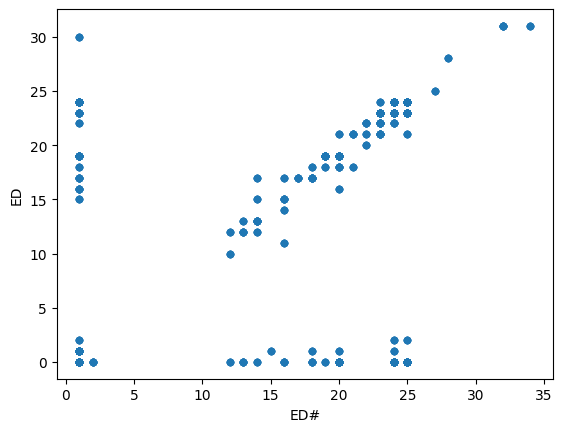

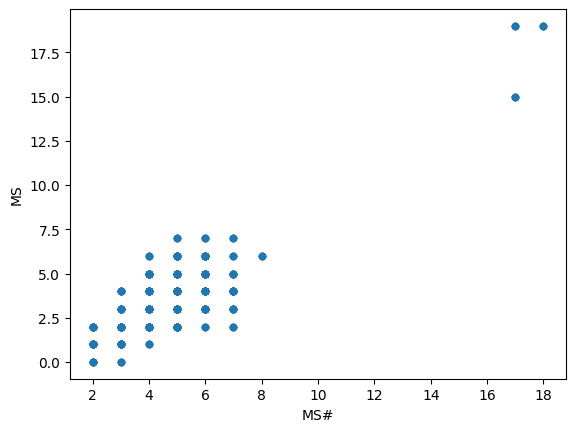

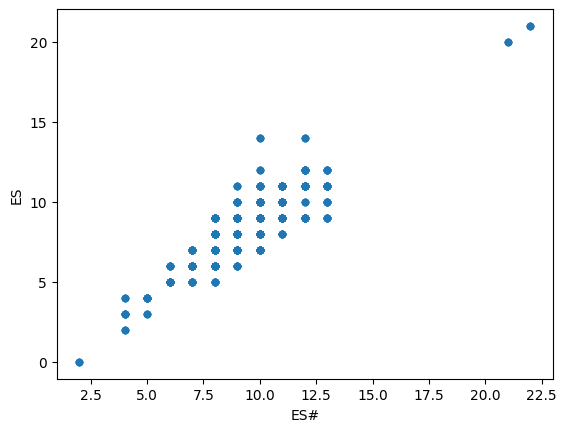

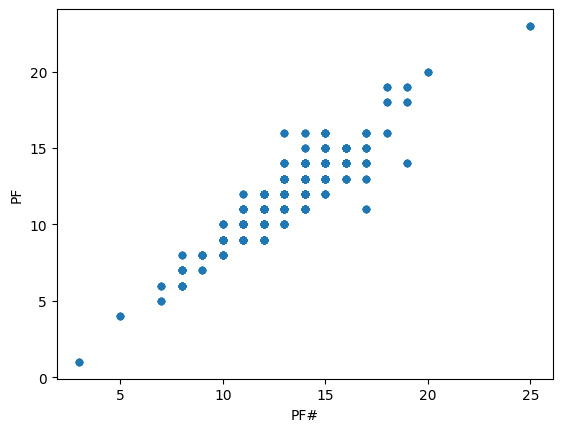

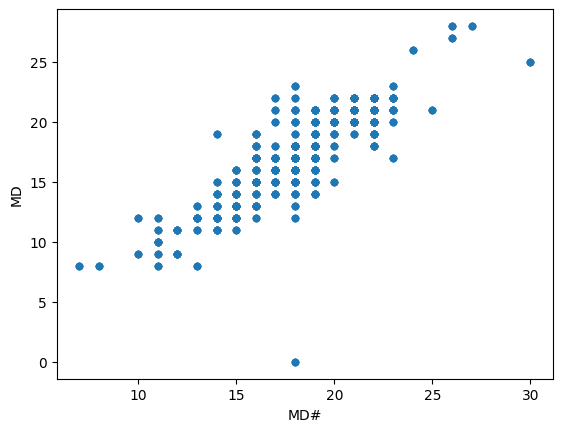

In [41]:
for k in ['ED','MS','ES','PF','MD']:
    merged.plot.scatter(x='{}#'.format(k),y=k);plt.show()

In [43]:
merged[['ED#','MS#','ES#','PF#','MD#']] = merged[['ED','MS','ES','PF','MD']]
merged.drop(labels=['ED','MS','ES','PF','MD'], axis='columns')
merged

,background,rv,myo,lv,y_path,t,t_norm,x_path,image,shape,...,ES#,PF#,MD#,phase,ED,MS,ES,PF,MD,pat_long
0,6970,189,79,73,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,2,0,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,5,8,11,MS,0,2,5,8,11,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
1,7043,139,79,49,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,5,1,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,5,8,11,ES,0,2,5,8,11,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
2,7022,147,81,60,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,7,2,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,5,8,11,PF,0,2,5,8,11,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
3,6920,210,76,104,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,11,3,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,5,8,11,MD,0,2,5,8,11,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
4,6906,219,85,100,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,13,4,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(10, 192, 138)",...,5,8,11,ED,0,2,5,8,11,0_0000-02z1l14n_2006-11-09_volume_clean.nrrd\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,13623,210,75,104,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,0,0,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,11,16,18,ED,0,5,11,16,18,0_0000-zzq0001q_2007-03-29_volume_clean.nrrd\n
1321,13679,196,68,69,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,4,1,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,11,16,18,MS,0,5,11,16,18,0_0000-zzq0001q_2007-03-29_volume_clean.nrrd\n
1322,13770,148,59,35,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,9,2,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,11,16,18,ES,0,5,11,16,18,0_0000-zzq0001q_2007-03-29_volume_clean.nrrd\n
1323,13738,160,61,52,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,13,3,/mnt/ssd/data/gcn/02_imported_4D_unfiltered/SA...,True,"(13, 256, 256)",...,11,16,18,PF,0,5,11,16,18,0_0000-zzq0001q_2007-03-29_volume_clean.nrrd\n


In [44]:
merged.to_csv('/mnt/ssd2/data/tof/02_imported_4D_unfiltered/SAx_3D_dicomTags_phase.csv')